# Challenge: Cancer data

## Objetivo:
Detectar los tumores malignos (M) y beningnos (B) de la variable diagnosis mediante el dataset que recaba múltiples características

1. Aplicar el algoritmo de KNN a [data.csv](https://drive.google.com/file/d/1CaTF1C-iNnz7dPKaUcKRMK4BC19E0QLT/view?usp=sharing) (No olvides estandarizar y crear una variable nueva a partir de las existentes)
2. Evaluar el rendimiento del modelo con el reporte de la clasificación

In [18]:
import numpy as np # Numeric Python, me deja manipular facilmente arreglos y listas numéricos
import pandas as pd # Pandas es la principal biblioteca de manejo de bases de datos en Python
import matplotlib.pyplot as plt # Este es para hacer grafiquitas
import seaborn as sns # Está basado en matplotlib, y hace gráficas más bonitas más fácil.

%matplotlib inline

In [60]:
sns.set_theme(context = 'notebook', style = 'darkgrid')

In [19]:
df = pd.read_csv("data.csv")
df.shape

(569, 33)

In [20]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
df = df.iloc[:,:32]

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [24]:
df['radius'] = df.radius_mean * df.radius_worst * df.radius_se

In [25]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [26]:
X = df.iloc[:, 2:32]
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [27]:
y = df.iloc[:,1]
y[0:10]

0    M
1    M
2    M
3    M
4    M
5    M
6    M
7    M
8    M
9    M
Name: diagnosis, dtype: object

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size = 0.20)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [30]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 7)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [32]:
y_pred = classifier.predict(x_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[73  0]
 [ 1 40]]
              precision    recall  f1-score   support

           B       0.99      1.00      0.99        73
           M       1.00      0.98      0.99        41

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [51]:
error = []
listi = []
for i in range(1, 20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    listi.append(i)
        
error

[0.02631578947368421,
 0.02631578947368421,
 0.017543859649122806,
 0.008771929824561403,
 0.008771929824561403,
 0.008771929824561403,
 0.008771929824561403,
 0.008771929824561403,
 0.008771929824561403,
 0.017543859649122806,
 0.008771929824561403,
 0.008771929824561403,
 0.008771929824561403,
 0.017543859649122806,
 0.02631578947368421,
 0.03508771929824561,
 0.043859649122807015,
 0.043859649122807015,
 0.03508771929824561]

In [54]:
error_df = pd.DataFrame(list(zip(listi, error))).rename(columns = {0: "Number of K-means", 1: "Error"})
error_df.head()

,Number of K-means,Error
0,1,0.026316
1,2,0.026316
2,3,0.017544
3,4,0.008772
4,5,0.008772


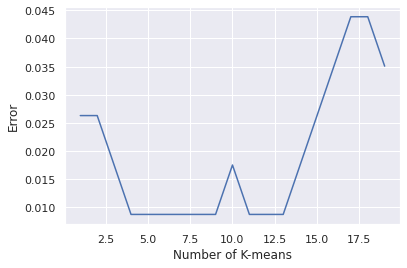

In [64]:
sns.lineplot(data = error_df, x = "Number of K-means", y = "Error")
plt.ylabel("Error")
plt.xlabel("Number of K-means")
plt.show()